In [46]:
# Loading Modules
from matplotlib import pyplot as plt
import numpy as np
import math
from celluloid import Camera
%matplotlib notebook

# Diffusion

In [2]:
# Bounds
start = 0 # start bound
stop = 20 # stop bound

In [3]:
# Model Parameters
dt = 0.01 # delta t
T = 300 # total time
Nt = int(T / dt)  # number of time steps
dx = 0.05  # delta x
Nx = int((abs(stop-start))/dx)  # number of x steps
mean_sl = 0.04 # mean step length of the animal
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

In [4]:
# CFL flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

In [5]:
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

In [6]:
# Initializing array with Nt, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [7]:
# Gaussian function used to specify initial conditions
def gaussian(x, mu, sigma):
    denom = sigma * ((2 * math.pi)**0.5)
    numerator = math.exp(((x - mu)**2) / ((sigma) **2) / -2)
    res = numerator / denom
    return res 

# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 10,
                   sigma = 0.5) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

In [8]:
# Explicit finite difference scheme for diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
        elif i == Nx:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
        else:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])

In [9]:
# Integration function using the trapezoid method
def integrate(u,dx,x_vals):
    area_under_curve = 0
    for i in range(0,len(x_vals)-1):
        area = dx * (u[i+1]+u[i]) / 2
        area_under_curve = area_under_curve + area
    return area_under_curve

# Checking for conservation
for j in range(0,Nt):
    res = integrate(u = u[j][1],
              dx = dx,
              x_vals = Xs)
    #print(res)

<IPython.core.display.Javascript object>


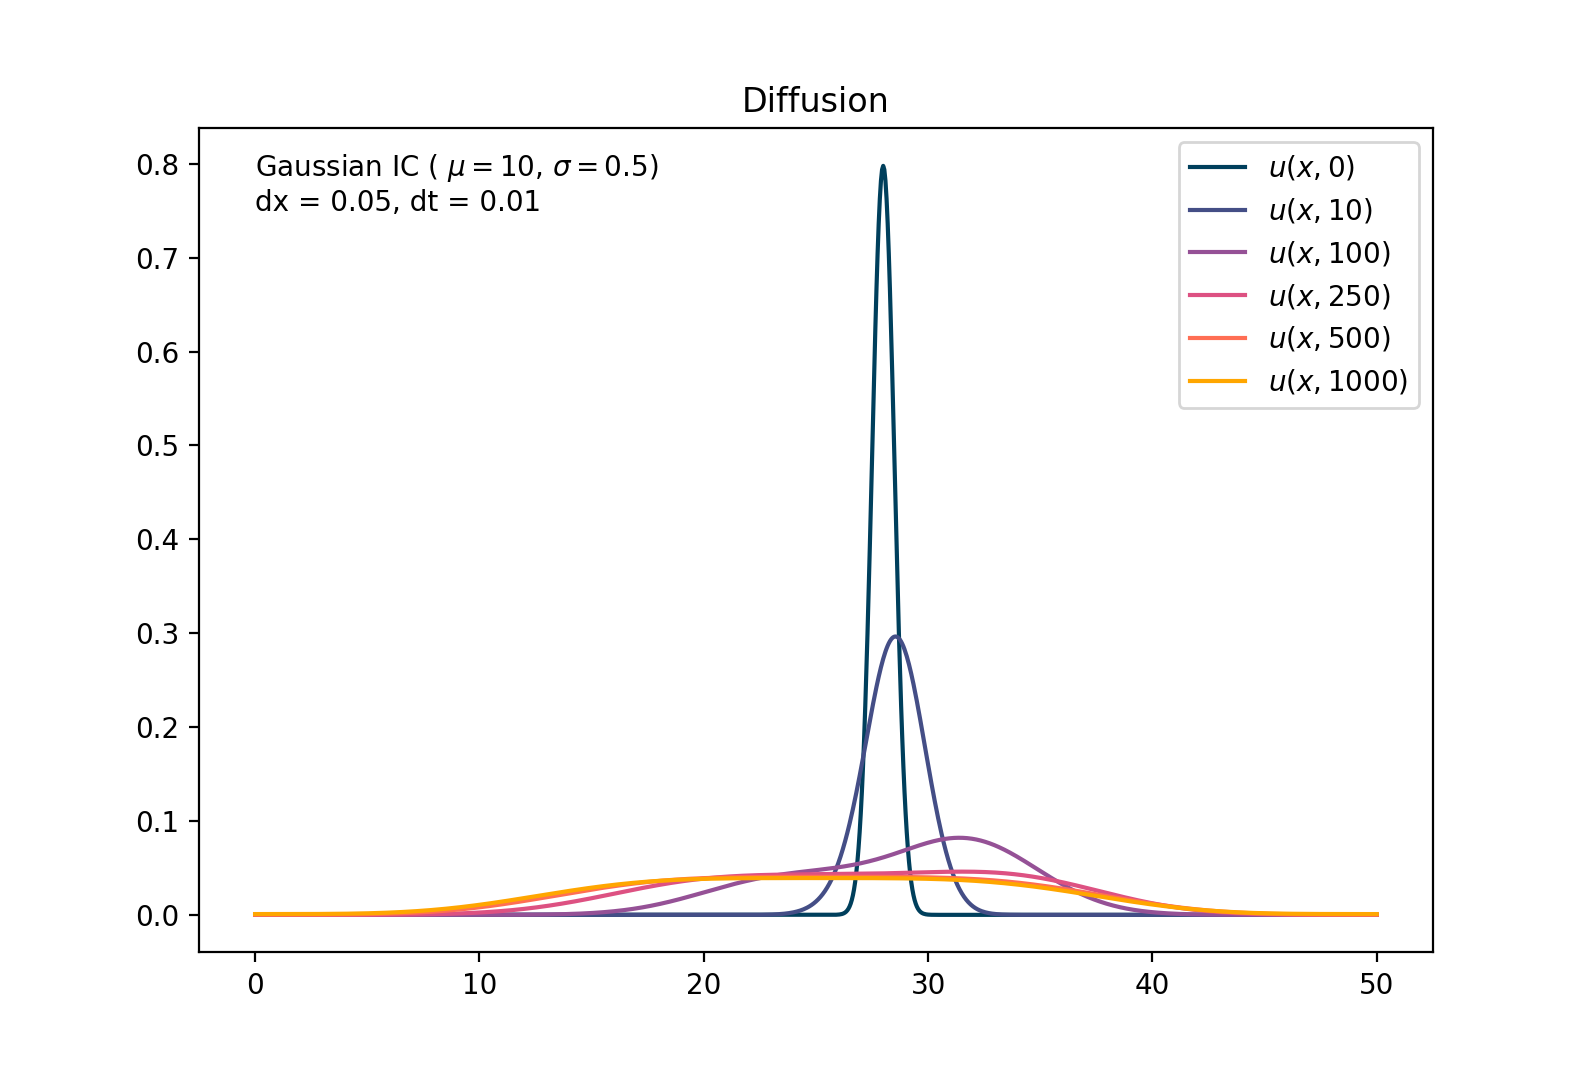

In [47]:
# Diffusion Plot
t0 = u[0][1]
t1 = u[int(0.01*Nt)][1]
t2 = u[int(0.1*Nt)][1]
t3 = u[int(0.25*Nt)][1]
t4 = u[int(0.5*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.01*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.1*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.25*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.5*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(0,0.75,"Gaussian IC ( " + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}")
plt.title("Diffusion")
plt.show()


# Advection
## Advection with constant speed

In [12]:
# Bounds
start = 0 # start bound
stop = 50 # stop bound

In [13]:
# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 300 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
c = 0.1 # advections speed
p = c * dt / dx /2 # courant number

In [14]:
# CFL flag
if p > 1:
    print("WARNING: Courant number > 1")

In [15]:
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

In [16]:
# Initializing array with Nt, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [17]:
# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 10,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

In [18]:
# First-order upwinding scheme
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j+1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][-1])
        else:
            u[j + 1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][i - 1])

### First-Order Upwinding Approach

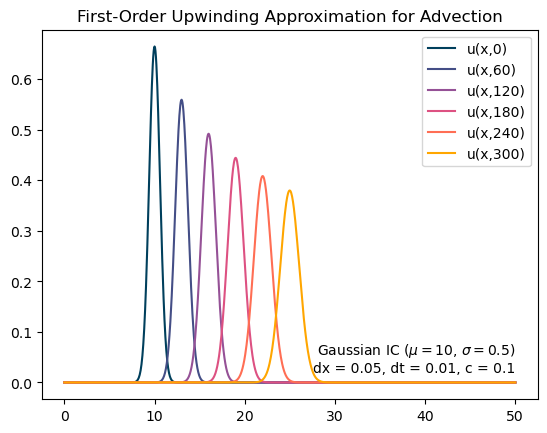

In [19]:
# First-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(50,0.02,"Gaussian IC (" + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'right')
plt.title("First-Order Upwinding Approximation for Advection")
plt.show()

In [20]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 1.0
Area under u(x,120) = 1.0
Area under u(x,180) = 1.0
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 1.0000000000000002


### Second-Order Upwinding Approach

In [21]:
# Second-order upwinding approach
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])

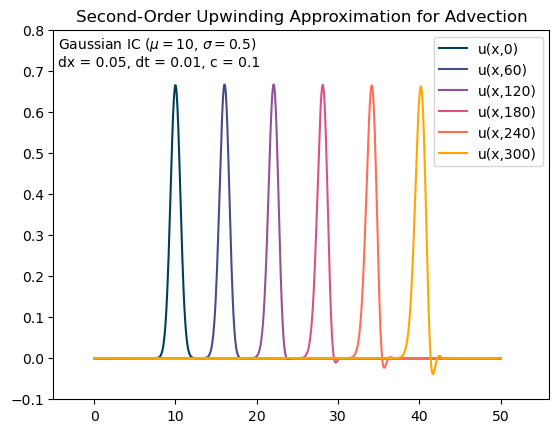

In [22]:
# Second-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(-4.5,0.71,"Gaussian IC (" + r'$\mu = 10$' + 
         ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'left')
plt.title("Second-Order Upwinding Approximation for Advection")
plt.ylim([-0.1,0.8])
plt.xlim([-5,56])
plt.show()

In [23]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 0.9999999999999993
Area under u(x,120) = 1.0000000000000002
Area under u(x,180) = 1.0000000000000013
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 0.9999999999999998


## Advection with Variable Speed

In [24]:
# Habitat Preference
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2 
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)
    return res

In [25]:
#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

In [26]:
# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 23,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

In [27]:
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])

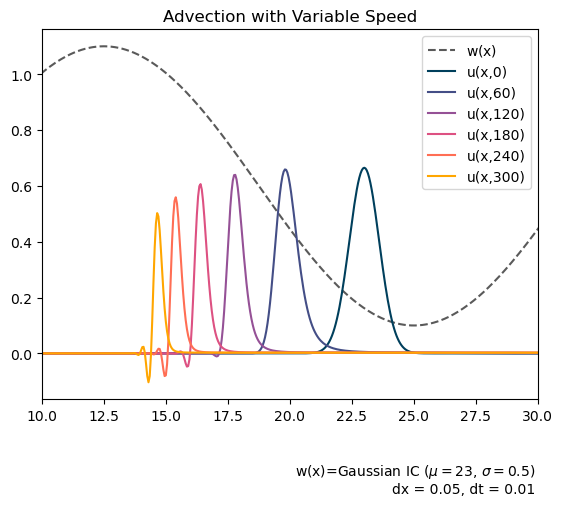

In [28]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
plt.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
plt.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
plt.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
plt.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
plt.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
plt.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(29.9,-0.5,"w(x)="+
         "Gaussian IC (" + r'$\mu = 23$' + ", " + r'$\sigma = 0.5)$' + 
         f"\ndx = {dx}, dt = {dt}", ha = 'right')
plt.title("Advection with Variable Speed")
plt.xlim([10,30])
plt.show()

In [29]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

Area under u(x,0) = 1.0000000000000002
Area under u(x,60) = 0.7792795317052899
Area under u(x,120) = 0.5287335829487156
Area under u(x,180) = 0.38943306821815143
Area under u(x,240) = 0.3007411616552028
Area under u(x,300) = 0.23959897942307748


## Modified advection scheme

In [30]:
# Second-order upwinding approach with normalization by area under the curve
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

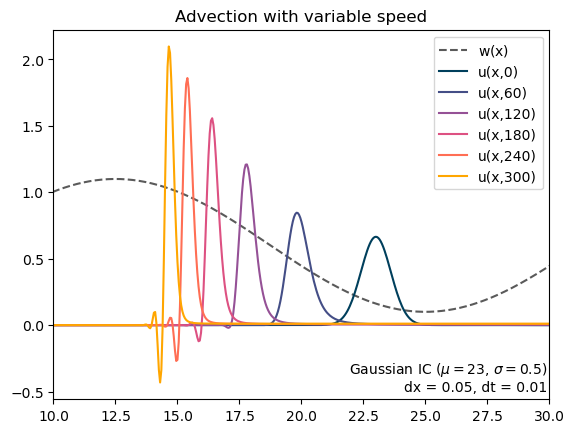

In [31]:
# Advection with variable speed
# Density is normalized by the area under the curve
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
plt.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
plt.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
plt.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
plt.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
plt.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
plt.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(29.9,-0.5,"Gaussian IC (" + r'$\mu = 23$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'right')
plt.title("Advection with variable speed")
plt.xlim([10,30])
plt.show()

In [32]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

Area under u(x,0) = 1.0000000000000002
Area under u(x,60) = 0.9999999999999989
Area under u(x,120) = 0.9999999999999992
Area under u(x,180) = 1.0000000000000002
Area under u(x,240) = 1.0000000000000009
Area under u(x,300) = 1.0000000000000002


# Advection and Diffusion

In [33]:
# Bounds
start = 0 # start bound
stop = 50 # stop bound

In [34]:
# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 1000 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
mean_sl = 0.04 #mean step length
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

In [35]:
# CFL flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

In [36]:
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt row, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [37]:
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2  # w1
    res = np.float64(res)
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)  # w1
    res = np.float64(res)
    return res

In [38]:
#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [39]:
#Setting Initial Condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 28,
                   sigma = 0.5) #Gaussin IC
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC #Populating initial condition in array u

In [40]:
# Finite difference scheme for advection and diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if p > 1: # CFL flag
            print("WARNING: Courant number > 1")
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx]) -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            elif i == Nx:
                u[j + 1][1][i] = r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1]) - p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][i - 2]) + u[j][1][i]
            else:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx]) + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == 0:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i + 2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

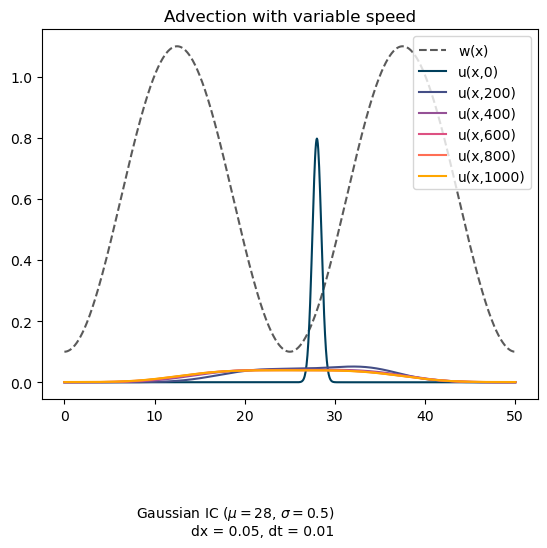

In [41]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
plt.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
plt.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
plt.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
plt.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
plt.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
plt.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(29.9,-0.5,"Gaussian IC (" + r'$\mu = 28$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'right')
plt.title("Advection with variable speed")
plt.show()